# SFM PIPELINE

In [25]:
from sfm import SFM
import matplotlib.pyplot as plt
# CHANGE TO IMAGE SOURCE FILE (and db path for pycolmap)
img_src = "datasets/templeRing"
db_path = "database.db"

## 1. FEATURE EXTRACTION AND MATCHING:
Flag options for BRISK-SIFT/SIFT-SIFT and image preprocessing (for obj. isolation)\

BRISK-SIFT (`brisk=True`)
- recommended when object has lots of texture

SIFT-SIFT (`brisk=False`)
- recommended when object has low texture; able to detect more 'subtle' features at the expense of computation

In [27]:
sfm = SFM(img_src, db_path=db_path, preprocess=False, brisk=True)

sfm.ft_extract()
sfm.ft_match()

17.png:  19%|█▉        | 9/47 [00:00<00:00, 88.56it/s]

.DS_Store is not an img...



45.png: 100%|██████████| 47/47 [00:00<00:00, 94.36it/s]




FEATURE EXTRACTION....


Image 46: 100%|██████████| 46/46 [00:03<00:00, 12.83it/s]



MATCHING...



(44, 45): 100%|██████████| 45/45 [00:20<00:00,  2.17it/s]                         


Elapsed Time: 20.724190950393677




defaultdict(list,
            {(0, 1): [< cv2.DMatch 0x2acd980d0>,
              < cv2.DMatch 0x2acd98110>,
              < cv2.DMatch 0x2acd98170>,
              < cv2.DMatch 0x2acd98250>,
              < cv2.DMatch 0x2acd98290>,
              < cv2.DMatch 0x2acd982d0>,
              < cv2.DMatch 0x2acd98350>,
              < cv2.DMatch 0x2acd98410>,
              < cv2.DMatch 0x2acd98490>,
              < cv2.DMatch 0x2acd98510>,
              < cv2.DMatch 0x2acd98550>,
              < cv2.DMatch 0x2acd98590>,
              < cv2.DMatch 0x2acd98650>,
              < cv2.DMatch 0x2acd986d0>,
              < cv2.DMatch 0x2acd989f0>,
              < cv2.DMatch 0x2acd98b70>,
              < cv2.DMatch 0x2acd98bf0>,
              < cv2.DMatch 0x2acd98ed0>,
              < cv2.DMatch 0x2acd99010>,
              < cv2.DMatch 0x2acd99090>,
              < cv2.DMatch 0x2acd99150>,
              < cv2.DMatch 0x2acd991d0>,
              < cv2.DMatch 0x2acd99350>,
              < cv2.DMatch 0x2a

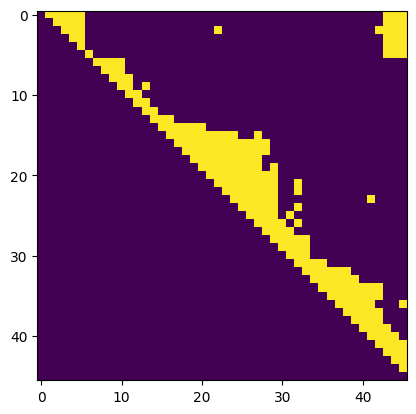

In [28]:
# VIEW ADJACENCY LIST OF MATCHES:
adj, oadj, _ = sfm.adj_list()
plt.imshow(oadj)
# plt.show()
# plt.imshow(oadj)
# plt.show()

## 2. SFM cont'd (3 options)
(Triangulation, Bundle Adjustment, Sparse/Dense Reconstruction)
1. COLMAP GUI
2. PyCOLMAP
3. PyCOLMAP and COLMAP GUI 

**note:** PyCOLMAP (on ft matches) is very inconsistent

### 2.1 via COLMAP GUI **recommended**
Create a colmap project in `img_src` and import features + feature matches. Continue the reconstruction pipeline from there\

ie. import features (via img path) &rarr; import matches (via match.txt for inlier feature matches) &rarr; start reconstruction &rarr; \
dense: undistort &rarr; stereo &rarr; fusion

In [24]:
# create .txt files for image features + matches
sfm.output()
# import these into COLMAP

### 2.2 via PyCOLMAP (**PYCOLMAP MUST BE COMPILED WITH CUDA**, ie. built from source)

In [ ]:
# SET DESTINATION FOLDER AND OBJECT NAME
dest = "output" 
obj_name = "object"
sfm.reconstruction_sparse(dest=dest, obj_name=obj_name)
sfm.reconstruction_dense(dest=dest, model_folder='/0') # can also change model_folder to '\1'


### 2.3a via PyCOLMAP database (contains features + cams only) and COLMAP
**recommended**

In [ ]:
dest = "output" 
obj_name = "object"
sfm.add_cams()
sfm.add_ft()
sfm.output()
# Use .db file + match.txt (inlier matches) in COLMAP GUI

### 2.3b via PyCOLMAP (sparse reconstruction) and COLMAP (dense reconstruction)
Inconsistent for some datasets

In [ ]:
dest = "output" 
obj_name = "object"
sfm.reconstruction_sparse(dest=dest, obj_name=obj_name)
# Use .db file in COLMAP GUI for dense reconstruction

# Surface/Mesh Reconstruction
Use resulting dense point cloud .ply files in the [surface reconstruction pipeline](reconstruction_pipeline.ipynb)